<a href="https://colab.research.google.com/github/LakshyaMalik/Plant-Disease-Detection/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing library

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New Section

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
print(tf.__version__)

2.17.0


Data preprocessing

In [ ]:
##tranining image preprocessing
training_set = tf.keras.utils.image_dataset_from_directory(
    directory="/content/drive/MyDrive/project data/plant_ds/train/",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256,256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 4032 files belonging to 4 classes.


In [ ]:
training_set


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [ ]:
##validation image preprocesing
validation_set = tf.keras.utils.image_dataset_from_directory(
    directory="/content/drive/MyDrive/project data/plant_ds/valid/",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256,256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 897 files belonging to 4 classes.


BUILDING MODEL

To avoid overshooting
- choose small learning rate
- to tackle underfitting increase no. of neurons
- Add more convulation layers to extract more features from images
- add dropout

In [ ]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()

In [ ]:
##BUILDING CONVulation LAYER1
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[256,256,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
##BUILDING CONVulation LAYER2
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=[256,256,3]))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))


In [ ]:
##BUILDING CONVulation LAYER3
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[256,256,3]))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))


In [ ]:
##BUILDING CONVulation LAYER4
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',input_shape=[256,256,3]))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))


In [ ]:
##Add dropout
model.add(tf.keras.layers.Dropout(0.25))

In [ ]:
##Flatten layer
model.add(Flatten())

In [ ]:
model.add(Dense(units=1500,activation='relu'))

In [ ]:
##Add dropout
model.add(tf.keras.layers.Dropout(0.4))

In [ ]:
#Output Layer
model.add(Dense(units=4,activation='softmax'))

In [ ]:
##Compiling Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 254, 254, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 252, 252, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 126, 126, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 124, 124, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 122, 122, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 61, 61, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 59, 59, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 57, 57, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 26, 26, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 24, 24, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │      55,297,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           6,004 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 57,259,600 (218.43 MB)

 Trainable params: 57,259,600 (218.43 MB)

 Non-trainable params: 0 (0.00 B)

Training model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=20)

Epoch 1/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 750s 6s/step - accuracy: 0.5617 - loss: 1.2705 - val_accuracy: 0.7146 - val_loss: 0.7907
Epoch 2/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 95s 311ms/step - accuracy: 0.8448 - loss: 0.4465 - val_accuracy: 0.9231 - val_loss: 0.2287
Epoch 3/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 43s 329ms/step - accuracy: 0.9057 - loss: 0.2834 - val_accuracy: 0.9108 - val_loss: 0.2620
Epoch 4/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 41s 327ms/step - accuracy: 0.9329 - loss: 0.2102 - val_accuracy: 0.9019 - val_loss: 0.2817
Epoch 5/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 82s 324ms/step - accuracy: 0.9572 - loss: 0.1439 - val_accuracy: 0.9208 - val_loss: 0.2516
Epoch 6/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 42s 331ms/step - accuracy: 0.9512 - loss: 0.1414 - val_accuracy: 0.8707 - val_loss: 0.4045
Epoch 7/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 82s 329ms/step - accuracy: 0.9103 - loss: 0.2610 - val_accuracy: 0.9220 - val_loss: 0.1966
Epoch 8/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 41s 328ms/step - accuracy: 0.9716 - loss: 0.0

In [ ]:
##Model evaluation on training set
training_loss, training_acc = model.evaluate(training_set)

126/126 ━━━━━━━━━━━━━━━━━━━━ 16s 128ms/step - accuracy: 0.9994 - loss: 0.0014


In [ ]:
print(training_loss , training_acc)

0.0012598475441336632 0.9995039701461792


In [ ]:
##Model evaluation on validation set
val_loss, val_acc = model.evaluate(validation_set)

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.9615 - loss: 0.1532


In [ ]:
print(val_loss , val_acc)

0.13775579631328583 0.9632107019424438


Saving Model


In [ ]:
model.save("iteration2l.h5")

In [ ]:
#record_history
import json
with open('training_history.json', 'w') as f:
  json.dump(training_history.history,f)

In [ ]:
training_history.history

{'accuracy': [0.7070932388305664,
  0.8727678656578064,
  0.9089781641960144,
  0.9335317611694336,
  0.9553571343421936,
  0.9640377163887024,
  0.9409722089767456,
  0.9774305820465088,
  0.988095223903656,
  0.983134925365448,
  0.9838789701461792,
  0.9846230149269104,
  0.9866071343421936,
  0.995039701461792,
  0.9890872836112976,
  0.9828869104385376,
  0.9883432388305664,
  0.9863591194152832,
  0.9875991940498352,
  0.9955357313156128],
 'loss': [0.8095681667327881,
  0.3647623658180237,
  0.26007360219955444,
  0.2025042325258255,
  0.14066718518733978,
  0.11655712127685547,
  0.16996008157730103,
  0.06585396081209183,
  0.040109362453222275,
  0.05331344157457352,
  0.0475890077650547,
  0.05039171129465103,
  0.03419923409819603,
  0.014009821228682995,
  0.033386316150426865,
  0.0577678419649601,
  0.031561627984046936,
  0.04345471039414406,
  0.03760923445224762,
  0.013197665102779865],
 'val_accuracy': [0.7146042585372925,
  0.9230769276618958,
  0.9108138084411621,

Accuracy Evaluation

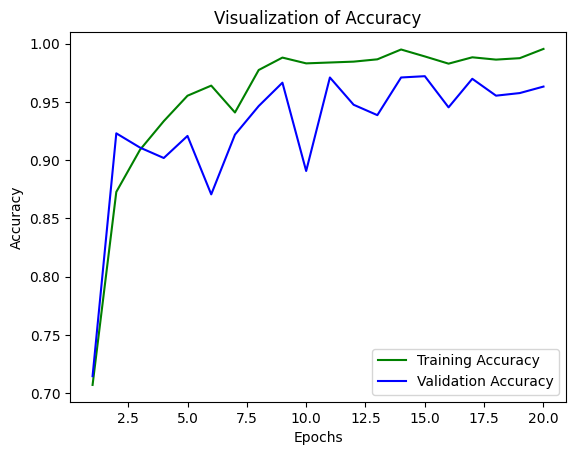

In [ ]:
epochs = list(range(1, 21))
plt.plot(epochs, training_history.history['accuracy'],color='green',label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.title('Visualization of Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
##test image preprocesing
test_set = tf.keras.utils.image_dataset_from_directory(
    directory="/content/drive/MyDrive/project data/plant_ds/valid/",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256,256),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 897 files belonging to 4 classes.


In [ ]:
y_pred=model.predict(test_set)

29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step


In [ ]:
pred_cat=tf.argmax(y_pred,axis=1)

In [ ]:
pred_cat

<tf.Tensor: shape=(897,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
     

In [ ]:
true_cat=tf.concat([y for x,y in test_set], axis=0)

Precision Matrix and Confusion Matrix


29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step


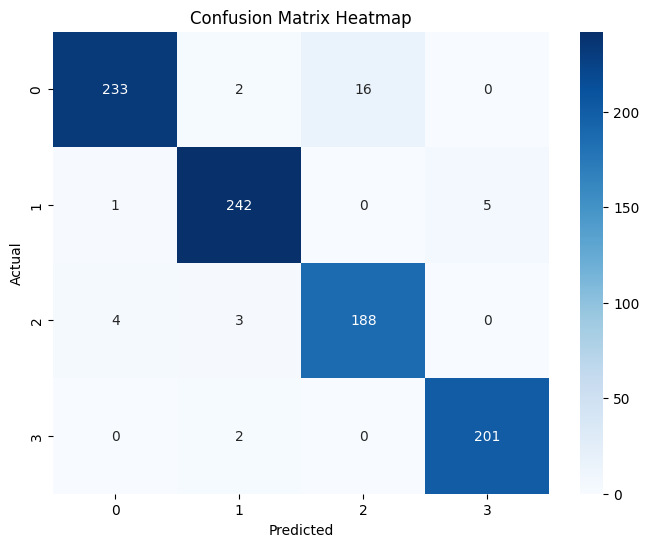

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Generate predictions
y_pred = model.predict(test_set)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.concatenate([np.argmax(y, axis=1) for x, y in test_set], axis=0)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np

y_pred = model.predict(test_set)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.concatenate([np.argmax(y, axis=1) for x, y in test_set], axis=0)

# Calculate Precision, Recall, and F1 Score
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")



29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 184ms/step
Precision: 0.96
Recall: 0.96
F1 Score: 0.96


In [ ]:
# Accuracy and Classification Report
accuracy = accuracy_score(y_true, y_pred_classes)
print(f"Accuracy: {accuracy}")

print("Classification Report:")
print(classification_report(y_true, y_pred_classes))

Accuracy: 0.9632107023411371
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       251
           1       0.97      0.98      0.97       248
           2       0.92      0.96      0.94       195
           3       0.98      0.99      0.98       203

    accuracy                           0.96       897
   macro avg       0.96      0.96      0.96       897
weighted avg       0.96      0.96      0.96       897

